In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 選取統一企業(1216)股票2013年1月1日到2014年12月31日交易數據

In [2]:
uni_President=pd.read_csv('1216.csv',sep=',')
uni_President.index=pd.to_datetime(uni_President.Date)
uni_President.head()

,Date,Date.1,Close,Open,High,Low,Volume,ROI
Date,,,,,,,,
2013-01-02,2013-01-02,2013-01-02,41.45,41.38,41.84,41.15,9438,1.1257
2013-01-03,2013-01-03,2013-01-03,41.45,41.53,41.68,41.22,9275,0.0000
2013-01-04,2013-01-04,2013-01-04,41.84,41.68,41.91,41.45,10912,0.9276
2013-01-07,2013-01-07,2013-01-07,41.38,41.45,41.68,41.22,7535,-1.1029
2013-01-08,2013-01-08,2013-01-08,41.30,41.22,41.68,41.15,4368,-0.1859


In [3]:
uni_President = uni_President['2013-01-01':'2014-12-31']
uni_President.head()

,Date,Date.1,Close,Open,High,Low,Volume,ROI
Date,,,,,,,,
2013-01-02,2013-01-02,2013-01-02,41.45,41.38,41.84,41.15,9438,1.1257
2013-01-03,2013-01-03,2013-01-03,41.45,41.53,41.68,41.22,9275,0.0000
2013-01-04,2013-01-04,2013-01-04,41.84,41.68,41.91,41.45,10912,0.9276
2013-01-07,2013-01-07,2013-01-07,41.38,41.45,41.68,41.22,7535,-1.1029
2013-01-08,2013-01-08,2013-01-08,41.30,41.22,41.68,41.15,4368,-0.1859


In [4]:
Close=uni_President.Close
closeDif=Close-Close.shift(1)
closeDif=closeDif.dropna()
closeDif.head()

Date
2013-01-03    0.00
2013-01-04    0.39
2013-01-07   -0.46
2013-01-08   -0.08
2013-01-09   -0.15
Name: Close, dtype: float64

In [5]:
indexprc=closeDif.index
upPrc=pd.Series(0,index=indexprc)
upPrc[closeDif>0]=closeDif[closeDif>0]
downPrc=pd.Series(0,index=indexprc)
downPrc[closeDif<0]=-closeDif[closeDif<0]
rsidata=pd.concat([Close,closeDif,upPrc,downPrc],axis=1)
rsidata.columns=['Close','closeChange','upPrc','downPrc']
rsidata=rsidata.dropna()
rsidata.head()

,Close,closeChange,upPrc,downPrc
Date,,,,
2013-01-03,41.45,0.00,0.00,0.00
2013-01-04,41.84,0.39,0.39,0.00
2013-01-07,41.38,-0.46,0.00,0.46
2013-01-08,41.30,-0.08,0.00,0.08
2013-01-09,41.15,-0.15,0.00,0.15


### 繪製K線圖&計算6日與30日RSI值並繪製曲線圖

In [6]:
SMUP=[]
SMDOWN=[]
for i in range(6,len(upPrc)+1):
    SMUP.append(np.mean(upPrc.values[(i-6):i],dtype=np.float32))
    SMDOWN.append(np.mean(downPrc.values[(i-6):i],dtype=np.float32))

In [7]:
rsi6=[100*SMUP[i]/(SMUP[i]+SMDOWN[i]) for i in range(len(SMUP))]

In [8]:
indexRsi=indexprc[5:]
Rsi6=pd.Series(rsi6,index=indexRsi)
Rsi6.head()
Rsi6.describe()

count    240.000000
mean      50.448768
std       24.959098
min        0.000000
25%       31.012031
50%       52.306469
75%       66.519824
max      100.000000
dtype: float64

In [9]:
def rsi(price,period=6):
    import pandas as pd
    closeDif=(price-price.shift(1)).dropna()
    upPrc=pd.Series(0,index=closeDif.index)
    upPrc[closeDif>0]=closeDif[closeDif>0]
    downPrc=pd.Series(0,index=closeDif.index)
    downPrc[closeDif<0]=-closeDif[closeDif<0]
    rsi=[]
    for i in range(period,len(upPrc)+1):
        up_mean = np.mean(upPrc.values[(i-period):i],\
        dtype=np.float32)
        up_down = np.mean(downPrc.values[(i-period):i],\
        dtype=np.float32)
        rsi.append(100*up_mean/(up_mean+up_down))
    rsi=pd.Series(rsi,index=closeDif.index[(period-1):])
    return(rsi)

### RSI標準改為90和10

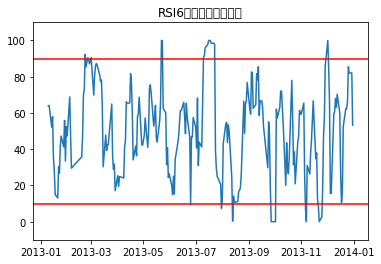

In [10]:
plt.plot(Rsi6)
plt.title('RSI6的超買線和超賣線')
plt.ylim(-10,110)
plt.axhline(y=90,color='red')
plt.axhline(y=10,color='red')
plt.show()

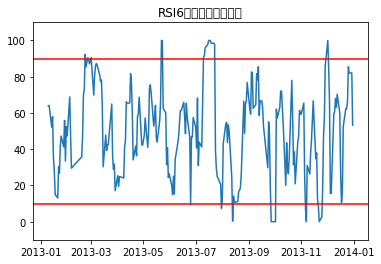

In [11]:
Rsi30=rsi(Close,30)
Rsi30.tail()

plt.plot(Rsi6)
plt.title('RSI6的超買線和超賣線')
plt.ylim(-10,110)
plt.axhline(y=90,color='red')
plt.axhline(y=10,color='red')
plt.show()

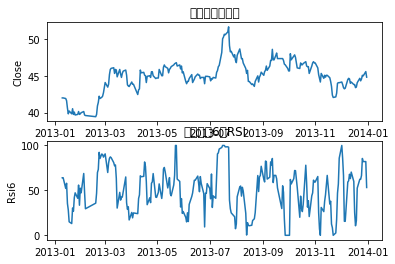

In [12]:
#收盤價和6日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi6.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')

plt.subplot(212)
plt.plot(Rsi6)
plt.ylabel('Rsi6')
plt.title('統一股票6日RSI')
plt.show()

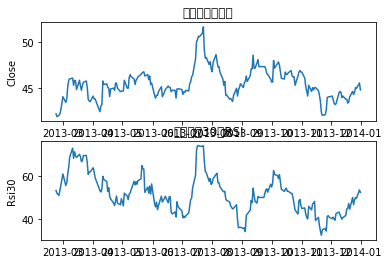

In [13]:
#收盤價和30日RSI的曲線圖
plt.subplot(211)
plt.plot(Close[Rsi30.index])
plt.ylabel('Close')
plt.title('統一股票收盤價')

plt.subplot(212)
plt.plot(Rsi30)
plt.ylabel('Rsi30')
plt.title('統一股票30日RSI')
plt.show()

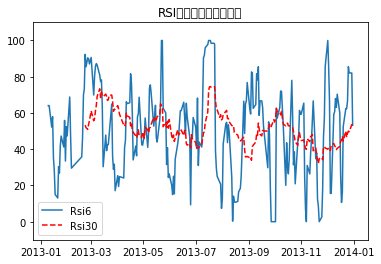

In [14]:
#黃金交叉和死亡交叉
plt.plot(Rsi6,label='Rsi6')
plt.plot(Rsi30,
         label='Rsi30',color='red',\
         linestyle='dashed')
plt.title('RSI黃金交叉和死亡交叉')
plt.ylim(-10,110)
plt.legend()
plt.show()

### 計算買賣信號準確率

In [15]:
#strategy
uni_President.index=pd.to_datetime(uni_President.Date)
Close =uni_President.Close
rsi6=rsi(Close,6)
rsi30=rsi(Close,30)

In [16]:
#rsi6捕捉買賣點
Sig1=[]
for i in rsi6:
    if i>90:
        Sig1.append(-1)
    elif i<10:
        Sig1.append(1)
    else:
        Sig1.append(0)

In [17]:
date1=rsi6.index
Signal1=pd.Series(Sig1,index=date1)
Signal1[Signal1==1].head(n=3)
Signal1[Signal1==-1].head(n=3)

Date
2013-02-22   -1
2013-02-25   -1
2013-03-01   -1
dtype: int64

In [18]:
Signal2=pd.Series(0,index=rsi30.index)
lagrsi6= rsi6.shift(1)
lagrsi30= rsi30.shift(1)
for i in rsi30.index:
    if (rsi6[i]>rsi30[i]) & (lagrsi6[i]<lagrsi30[i]):
        Signal2[i]=1
    elif (rsi6[i]<rsi30[i]) & (lagrsi6[i]>lagrsi30[i]):
        Signal2[i]=-1

In [19]:
signal=Signal1+Signal2
signal[signal==2] = 1
signal[signal==-2] = -1
signal=signal.dropna()

In [20]:
tradSig=signal.shift(1)

In [21]:
ret=Close/Close.shift(1)-1
ret.head()

Date
2013-01-02         NaN
2013-01-03    0.000000
2013-01-04    0.009409
2013-01-07   -0.010994
2013-01-08   -0.001933
Name: Close, dtype: float64

In [22]:
ret=ret[tradSig.index]
buy=tradSig[tradSig==1]
buyRet=ret[tradSig==1]*buy

In [23]:
sell=tradSig[tradSig==-1]
sellRet=ret[tradSig==-1]*sell

tradeRet=ret*tradSig

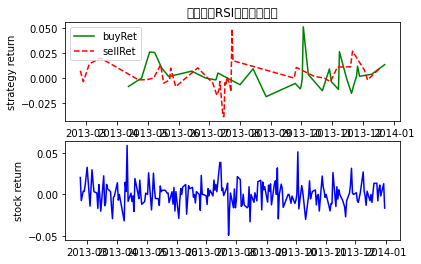

In [24]:
plt.subplot(211)
plt.plot(buyRet,label='buyRet',color='g')
plt.plot(sellRet,label='sellRet',
    color='r',linestyle='dashed')
plt.title('統一股票RSI指標交易策略')
plt.ylabel('strategy return')
plt.legend()
plt.subplot(212)
plt.plot(ret,'b')
plt.ylabel('stock return')
plt.show()

In [25]:
def strat(tradeSignal,ret):
    ret=ret[tradeSignal.index]
    tradeRet=ret*tradeSignal
    tradeRet[tradeRet==(-0)]=0
    winRate=len(tradeRet[tradeRet>0])/len(\
           tradeRet[tradeRet!=0])
    meanWin=sum(tradeRet[tradeRet>0])/len(\
            tradeRet[tradeRet>0])
    meanLoss=sum(tradeRet[tradeRet<0])/len(\
             tradeRet[tradeRet<0])
    perform={'winRate':winRate,\
    'meanWin':meanWin,\
    'meanLoss': meanLoss}
    return(perform)

BuyOnly=strat(buy,ret)
SellOnly=strat(sell,ret)
Trade=strat(tradSig,ret)
Test=pd.DataFrame({"BuyOnly":BuyOnly,\
        "SellOnly":SellOnly,"Trade":Trade})
Test

,BuyOnly,SellOnly,Trade
winRate,0.586207,0.470588,0.515625
meanWin,0.012388,0.013834,0.013089
meanLoss,-0.009059,-0.009718,-0.009454


Text(0.5, 1.0, 'RSI指標交易策略累積收益率')

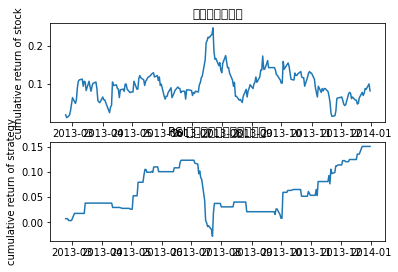

In [26]:
# 累計收益率
cumStock=np.cumprod(1+ret)-1
cumTrade=np.cumprod(1+tradeRet)-1

plt.subplot(211)
plt.plot(cumStock)
plt.ylabel('cumulative return of stock')
plt.title('原始累積收益率')
plt.subplot(212)
plt.plot(cumTrade)
plt.ylabel('cumulative return of strategy')
plt.title('RSI指標交易策略累積收益率')